In [1]:
import glob
import pandas as pd
paths = glob.glob("train/cat.*.jpg")
catdf = pd.DataFrame(columns=["path", "target"])
catdf["path"] = paths
catdf["target"] = 0
paths = glob.glob("train/dog.*.jpg")
dogdf = pd.DataFrame(columns=["path", "target"])
dogdf["path"] = paths
dogdf["target"] = 1
traindf = pd.concat([catdf, dogdf], ignore_index=True)
traindf

,path,target
0,train/cat.5077.jpg,0
1,train/cat.2718.jpg,0
2,train/cat.10151.jpg,0
3,train/cat.3406.jpg,0
4,train/cat.4369.jpg,0
5,train/cat.7660.jpg,0
6,train/cat.8553.jpg,0
7,train/cat.9895.jpg,0
8,train/cat.1211.jpg,0
9,train/cat.6218.jpg,0


In [2]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import BatchNormalization
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
for l in vgg.layers:
    l.trainable = False
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [4]:
# numpy array
import numpy as np
# scikit-learn
from sklearn.model_selection import train_test_split
x = np.array(traindf["path"])
y = np.array(traindf["target"])
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.1)

In [5]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
# PIL: Pillow
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
img = load_img(x_train[0], target_size=(224, 224, 3))
preprocess_input(np.array(img))

array([[[-6.3939003e+01, -5.0778999e+01, -5.0680000e+01],
        [-6.5939003e+01, -5.1778999e+01, -4.8680000e+01],
        [-6.8939003e+01, -5.0778999e+01, -4.8680000e+01],
        ...,
        [ 9.2060997e+01,  6.5221001e+01,  3.5320000e+01],
        [ 7.1060997e+01,  4.5221001e+01,  3.6320000e+01],
        [ 8.0609970e+00, -1.7778999e+01, -2.6680000e+01]],

       [[-6.4939003e+01, -5.1778999e+01, -5.1680000e+01],
        [-6.5939003e+01, -4.9778999e+01, -4.7680000e+01],
        [-6.9939003e+01, -4.9778999e+01, -4.7680000e+01],
        ...,
        [ 9.2060997e+01,  6.7221001e+01,  3.6320000e+01],
        [ 7.5060997e+01,  4.9221001e+01,  4.0320000e+01],
        [ 8.0609970e+00, -1.7778999e+01, -2.6680000e+01]],

       [[-6.8939003e+01, -5.2778999e+01, -5.0680000e+01],
        [-6.4939003e+01, -4.6778999e+01, -4.4680000e+01],
        [-6.7939003e+01, -4.8778999e+01, -4.4680000e+01],
        ...,
        [ 9.3060997e+01,  6.8221001e+01,  3.7320000e+01],
        [ 7.6060997e+01,  5.1

In [10]:
batch = 20
train = 10
for i in range(train):
    img_list = []
    idx = np.random.randint(0, x_train.shape[0], batch)
    for fp in x_train[idx]:
        img = load_img(fp, target_size=(224, 224, 3))
        img_pre = preprocess_input(np.array(img))
        img_list.append(img_pre)
    x_train_np = np.array(img_list)
    y_train_np = np.array(y_train_cat[idx])
    result = cnn.train_on_batch(x_train_np, y_train_np)
    print("-" * 15, i, "-" * 15)
    print(result)

--------------- 0 ---------------
[1.1945825, 0.85]
--------------- 1 ---------------
[0.49639097, 0.9]
--------------- 2 ---------------
[0.99062455, 0.9]
--------------- 3 ---------------
[1.6146294, 0.9]
--------------- 4 ---------------
[1.7964876, 0.75]
--------------- 5 ---------------
[0.0012650546, 1.0]
--------------- 6 ---------------
[2.4202492, 0.8]
--------------- 7 ---------------
[1.7583375e-07, 1.0]
--------------- 8 ---------------
[0.6382412, 0.85]
--------------- 9 ---------------
[1.6118095, 0.9]


In [29]:
batch = 200
test_img_list = []
test_img_list_ori = []
idx = np.random.randint(0, x_test.shape[0], batch)
for fp in x_test[idx]:
    img = load_img(fp, target_size=(224, 224, 3))
    test_img_list_ori.append(np.array(img))
    img_pre = preprocess_input(np.array(img))
    test_img_list.append(img_pre)
x_test_np = np.array(test_img_list)
y_test_np = np.array(y_test_cat[idx])
y_test_ori = y_test[idx]
cnn.evaluate(x_test_np, y_test_np)

200/200 [==============================] - 72s 358ms/step


[0.6547618160535785, 0.935]

In [31]:
pre = cnn.predict(x_test_np)
pre

array([[3.36284806e-10, 1.00000000e+00],
       [9.38153386e-01, 6.18466251e-02],
       [6.50124884e-22, 1.00000000e+00],
       [1.00000000e+00, 6.79347433e-37],
       [1.00000000e+00, 2.67427259e-29],
       [4.05199791e-26, 1.00000000e+00],
       [4.46234162e-16, 1.00000000e+00],
       [9.99976993e-01, 2.29521174e-05],
       [1.06161449e-24, 1.00000000e+00],
       [1.78400867e-08, 1.00000000e+00],
       [1.00000000e+00, 6.09471581e-31],
       [7.95588791e-01, 2.04411209e-01],
       [2.12869694e-04, 9.99787152e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.01269026e-17, 1.00000000e+00],
       [1.89482405e-11, 1.00000000e+00],
       [1.27065494e-30, 1.00000000e+00],
       [1.70715686e-09, 1.00000000e+00],
       [2.66955700e-03, 9.97330427e-01],
       [1.00000000e+00, 8.48359231e-15],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [4.75992812e-18, 1.00000000e+00],
       [5.05055777e-06, 9.99994993e-01],
       [1.040938

到底有幾個預測錯誤: 13


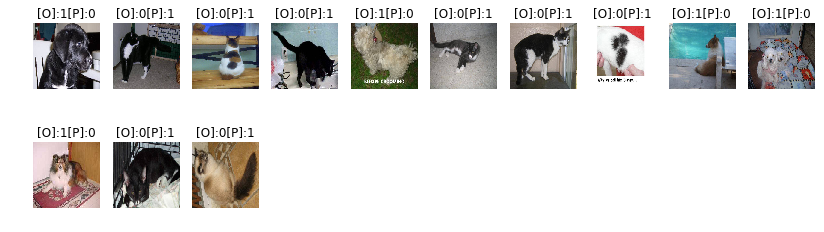

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
pre_ori = pre.argmax(axis=-1)
test_img_list_ori = np.array(test_img_list_ori)
y_test_ori = np.array(y_test_ori)
false_index = np.nonzero(pre_ori != y_test_ori)[0]
print("到底有幾個預測錯誤:", len(false_index))
false_img = test_img_list_ori[false_index]
ori_label = y_test_ori[false_index]
pre_label = pre_ori[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 4))
for (index, img) in enumerate(false_img):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)